In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\burha\OneDrive\practice_datasets\cleaned data of stored retial")

In [4]:
df.head()

,Order Date,Ship Date,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Flag,Days to Ship,Sales_per_Quantity,Order Year,Order Month,YearMonth,Log Sales
0,2016-11-08,2016-11-11,Second Class,Consumer,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,1,3,130.9800,2016,11,2016-11,5.572002
1,2016-11-08,2016-11-11,Second Class,Consumer,South,Furniture,Chairs,731.9400,3,0.00,219.5820,1,3,243.9800,2016,11,2016-11,6.597064
2,2016-06-12,2016-06-16,Second Class,Corporate,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,1,4,7.3100,2016,6,2016-06,2.748552
3,2015-10-11,2015-10-18,Standard Class,Consumer,South,Furniture,Tables,957.5775,5,0.45,-383.0310,0,7,191.5155,2015,10,2015-10,6.865450
4,2015-10-11,2015-10-18,Standard Class,Consumer,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,1,7,11.1840,2015,10,2015-10,3.151368


<Axes: xlabel='Profit', ylabel='Discount'>

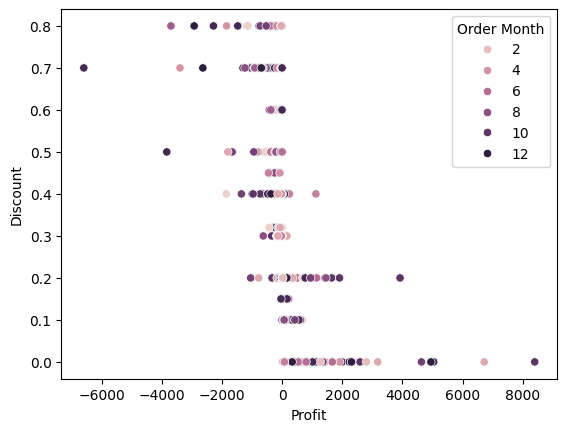

In [5]:
sns.scatterplot(data=df,x='Profit',y='Discount',hue='Order Month')

In [6]:
corrdf=df[['Sales','Profit','Discount']].describe()
corrdf

,Sales,Profit,Discount
count,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,0.156203
std,623.245101,234.260108,0.206452
min,0.444000,-6599.978000,0.000000
25%,17.280000,1.728750,0.000000
50%,54.490000,8.666500,0.200000
75%,209.940000,29.364000,0.200000
max,22638.480000,8399.976000,0.800000


Text(0.5, 1.0, 'Sales Distribution')

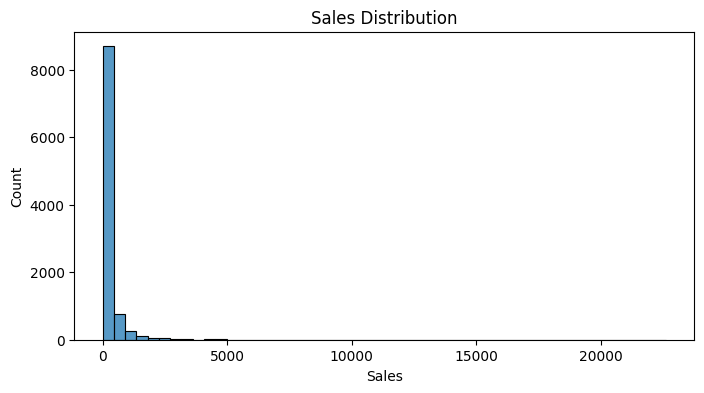

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(df['Sales'],bins=50)
plt.title('Sales Distribution')

Text(0.5, 1.0, 'Profit Outliers')

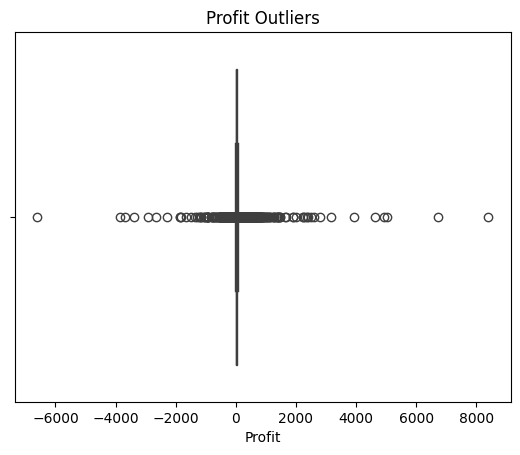

In [8]:
sns.boxplot(x=df['Profit'])
plt.title('Profit Outliers')

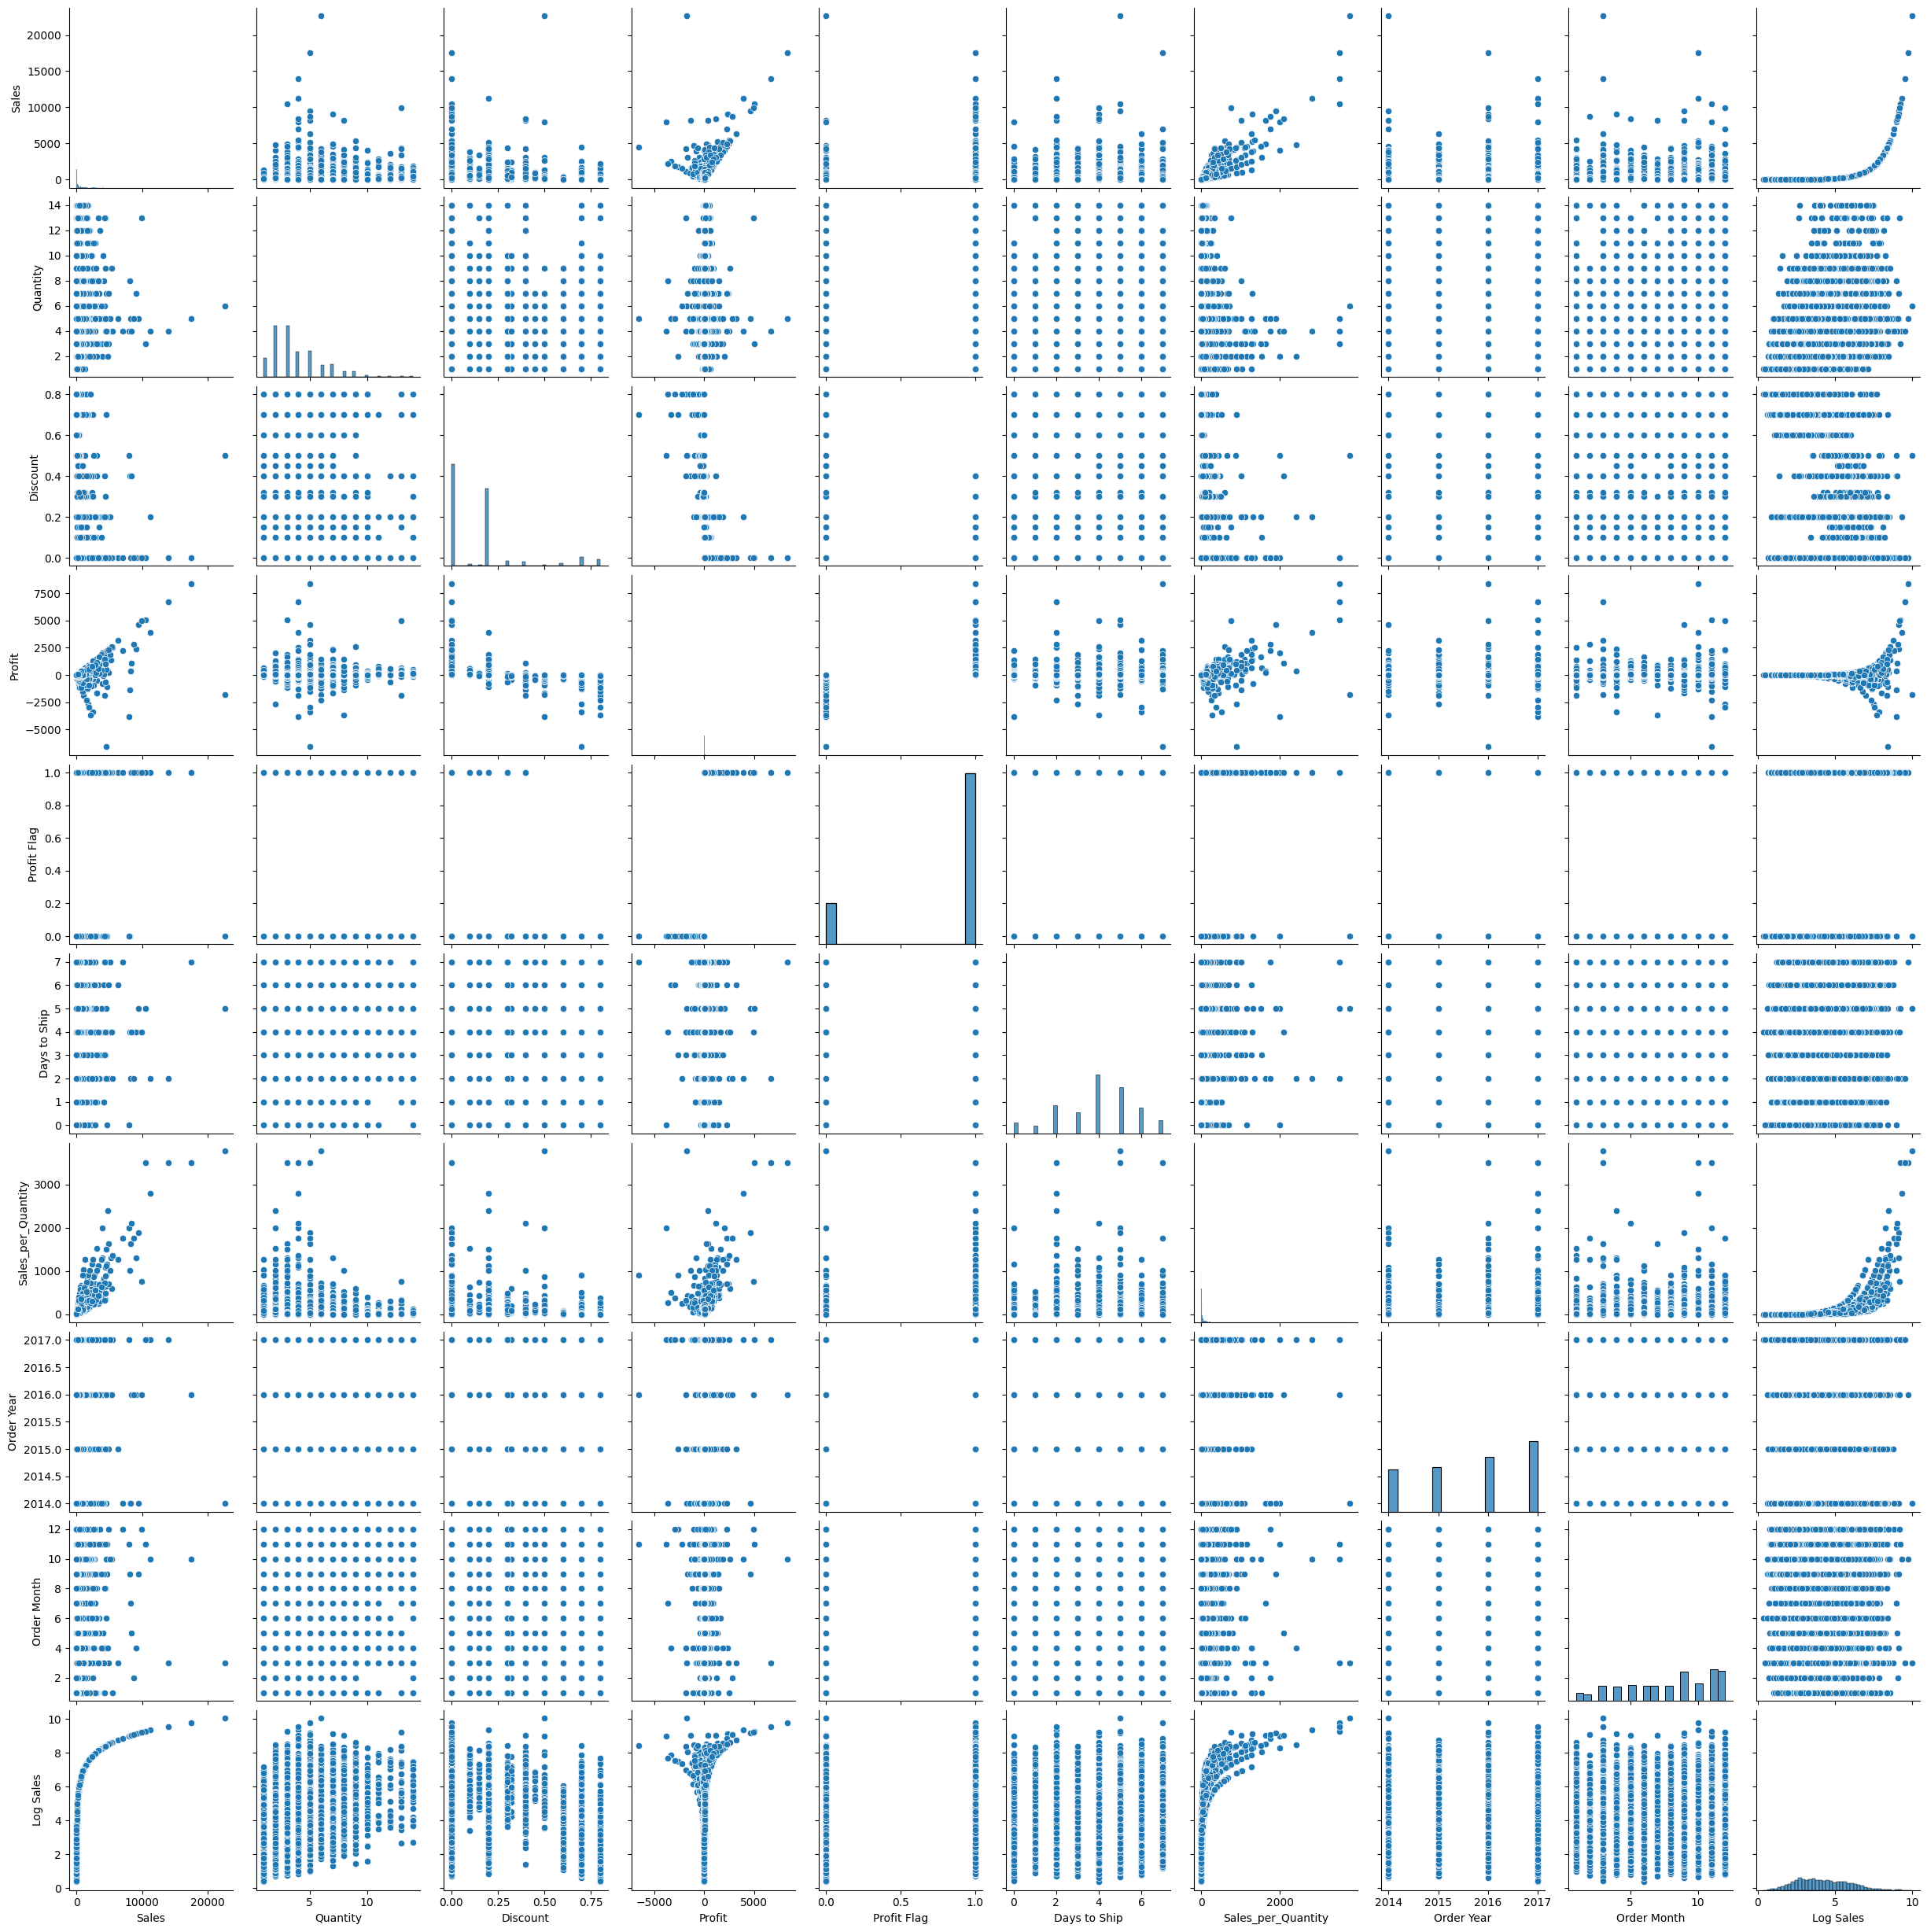

In [25]:
sns.pairplot(data=df)
plt.show()

In [ ]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Profit Flag', 'Days to Ship', 'Sales_per_Quantity', 'Order Year',
       'Order Month', 'YearMonth', 'Log Sales'],
      dtype='object')

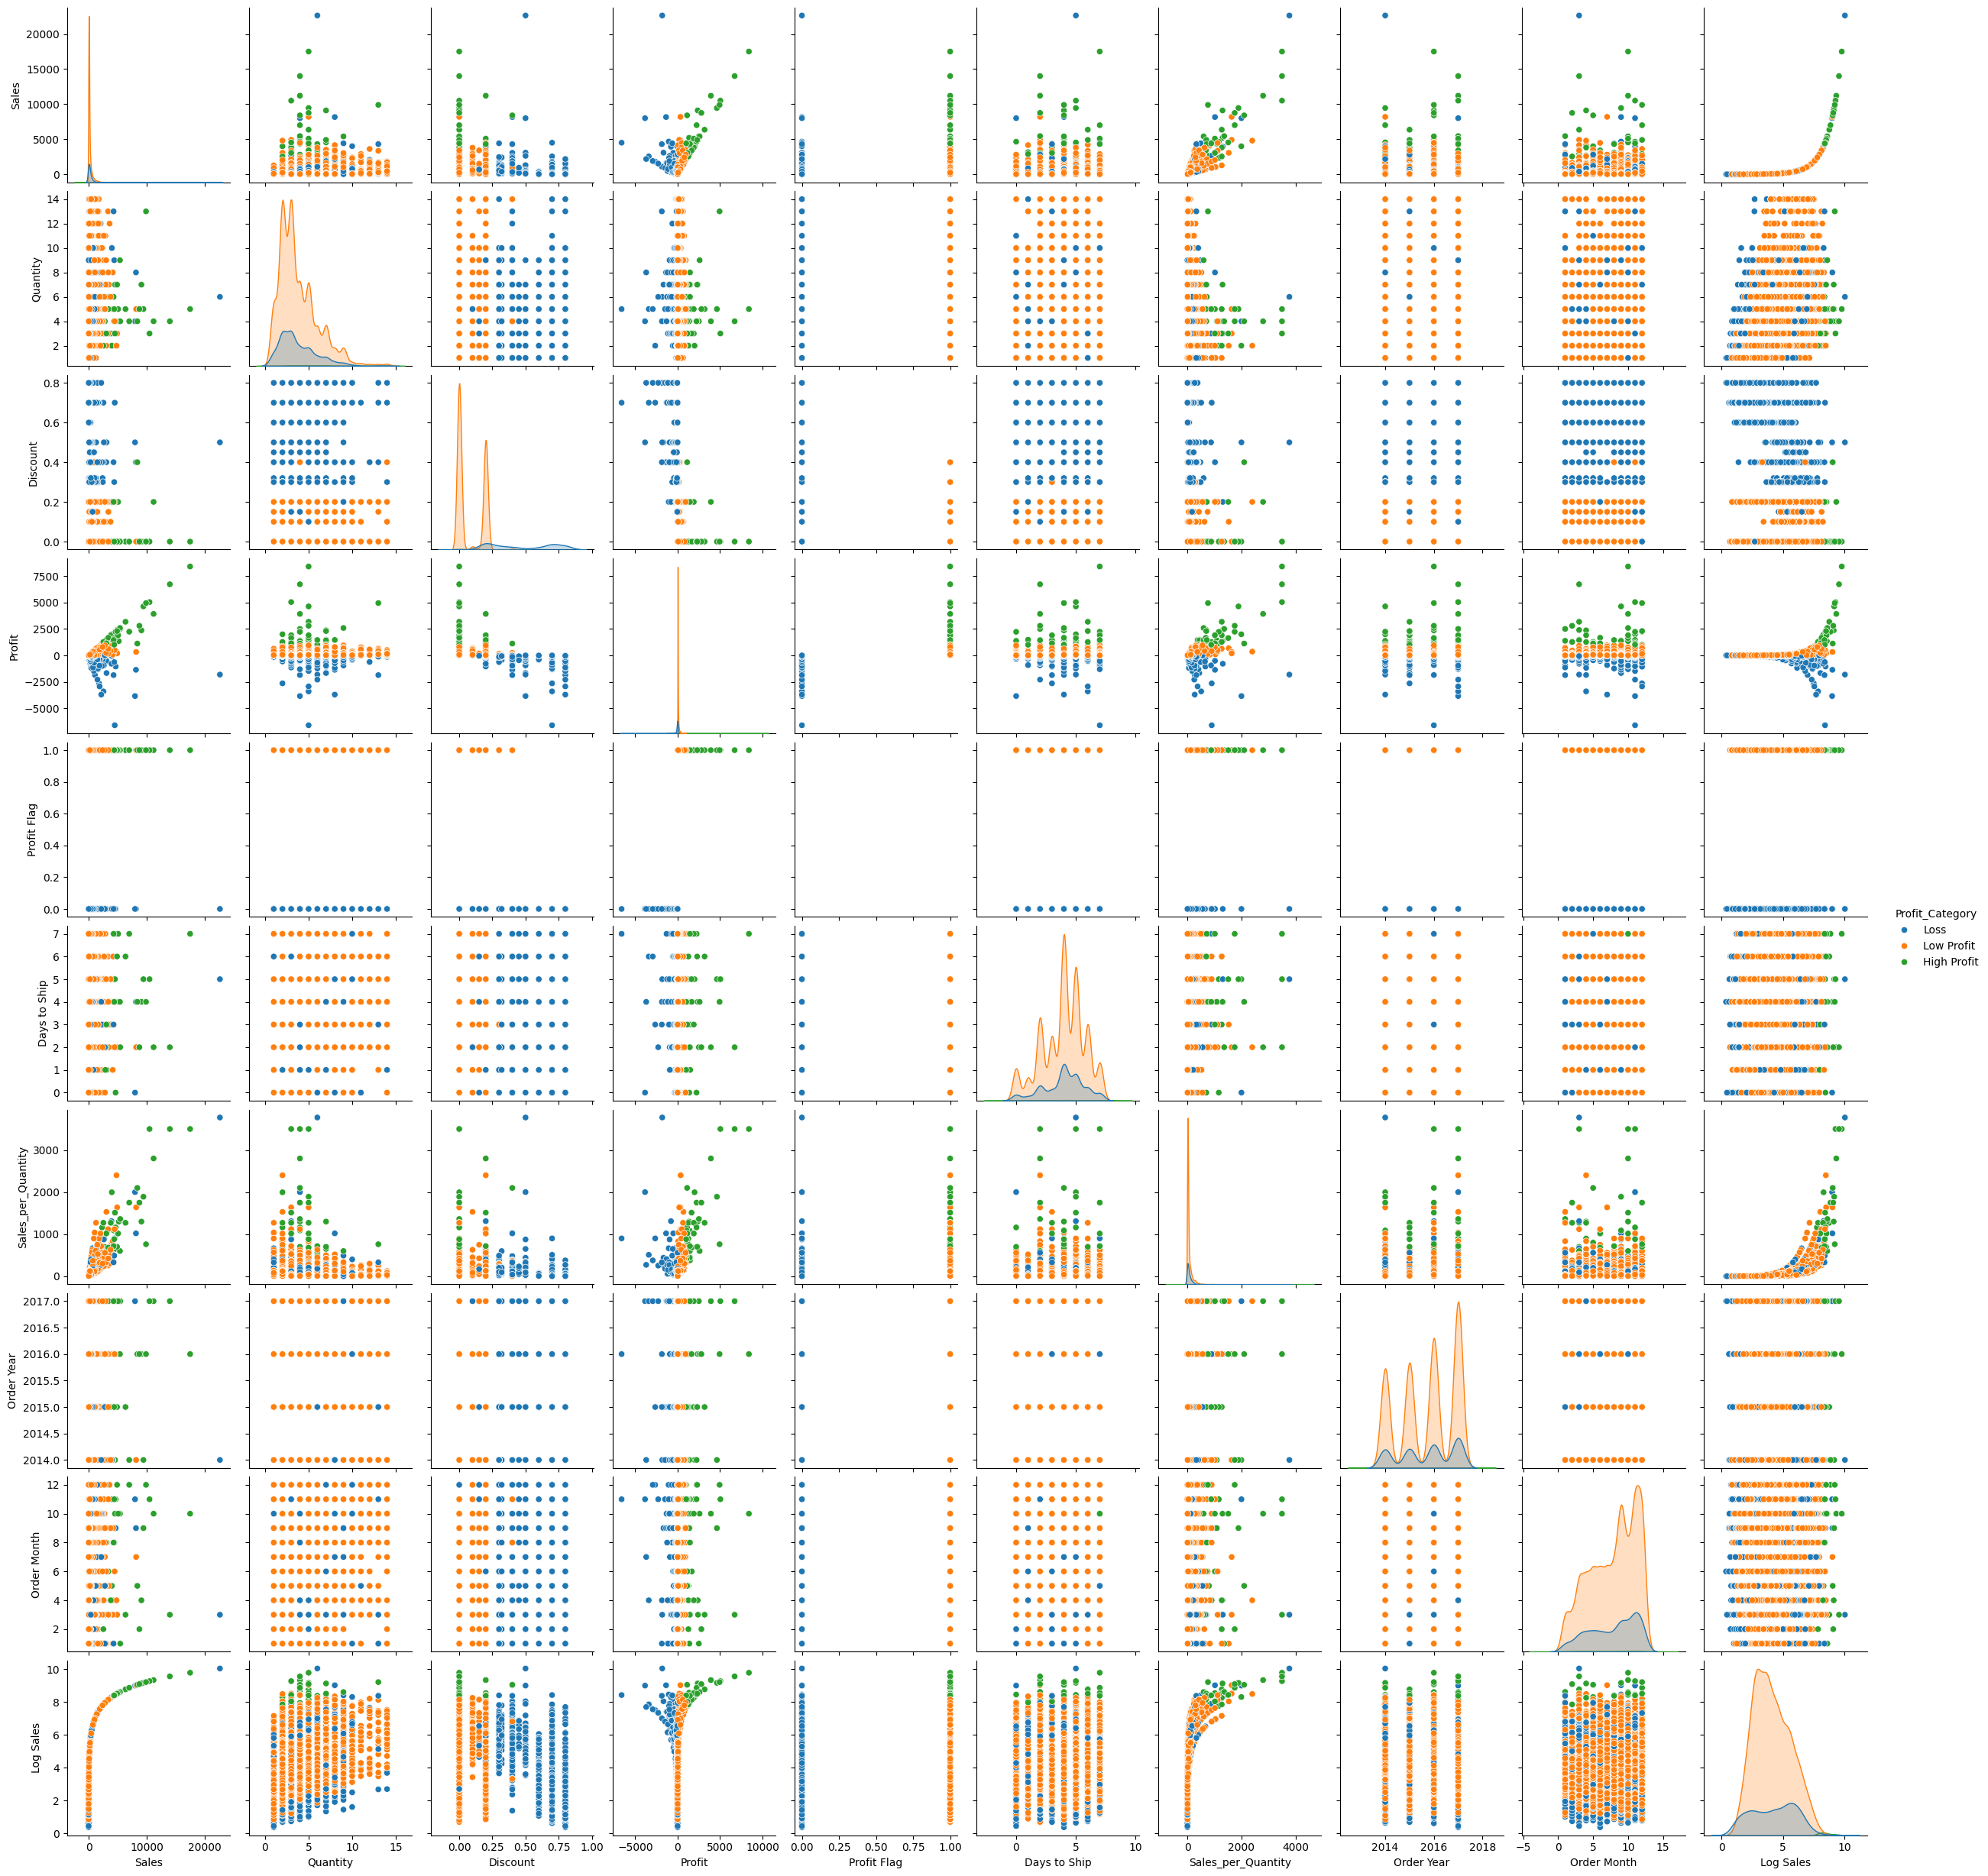

In [ ]:
# Create bins for the 'Profit' column
df['Profit_Category'] = pd.cut(df['Profit'], 
                              bins=[-np.inf, 0, 1000, np.inf], 
                              labels=['Loss', 'Low Profit', 'High Profit'])

# Now, use this new categorical column for the hue parameter
sns.pairplot(data=df, hue='Profit_Category')
plt.show()

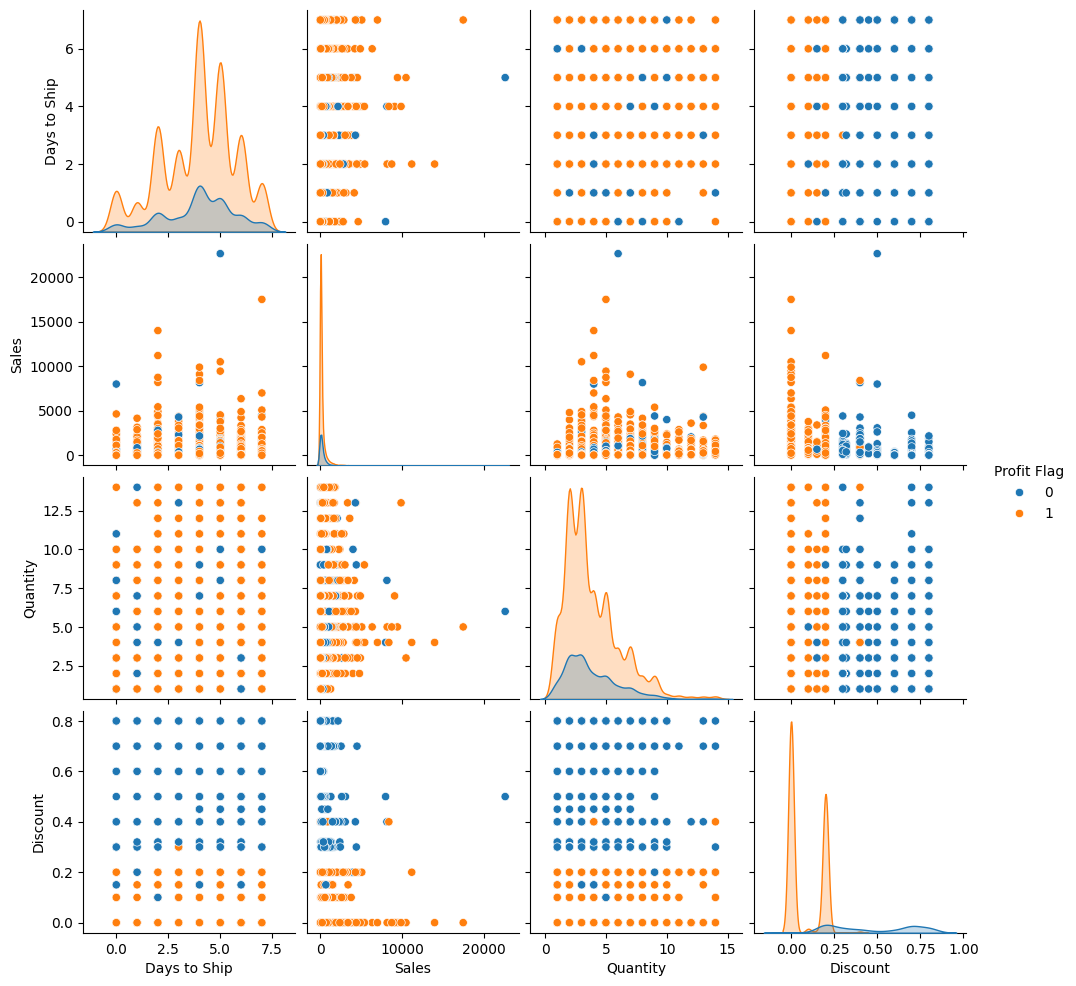

In [ ]:
columns_to_grid= ['Days to Ship', 'Sales', 'Quantity', 'Discount']
sns.pairplot(data=df, vars= columns_to_grid, hue='Profit Flag')

<Axes: xlabel='Sales', ylabel='Profit'>

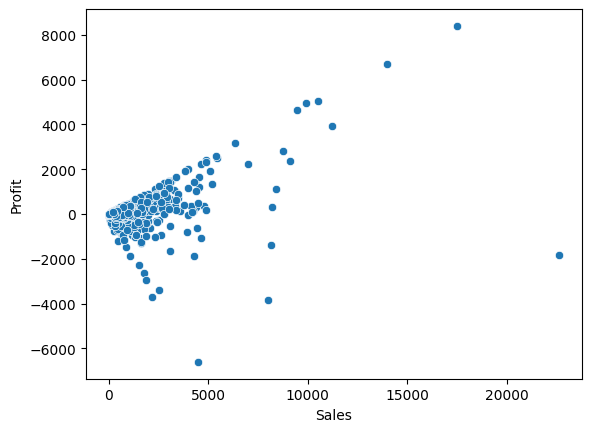

In [ ]:
sns.scatterplot(x='Sales',y='Profit',data=df)

<Axes: xlabel='Category', ylabel='Profit'>

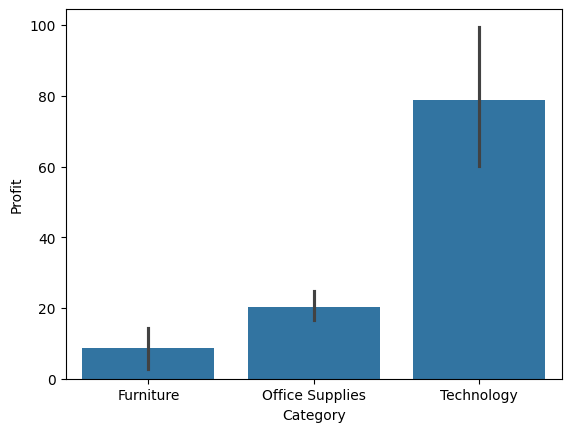

In [ ]:
sns.barplot(x='Category',y='Profit',data=df)

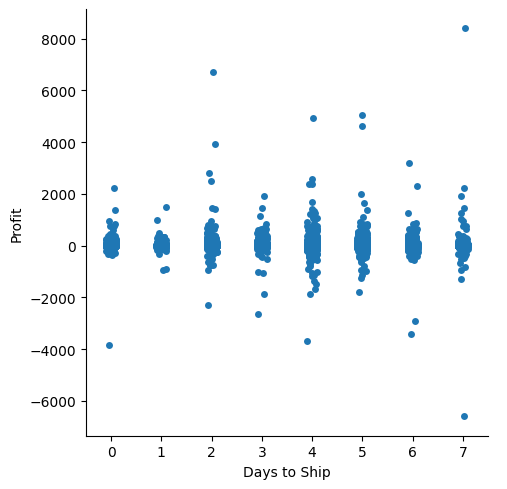

In [ ]:
sns.catplot(data=df,x='Days to Ship',y='Profit')

<Axes: xlabel='Discount', ylabel='Profit'>

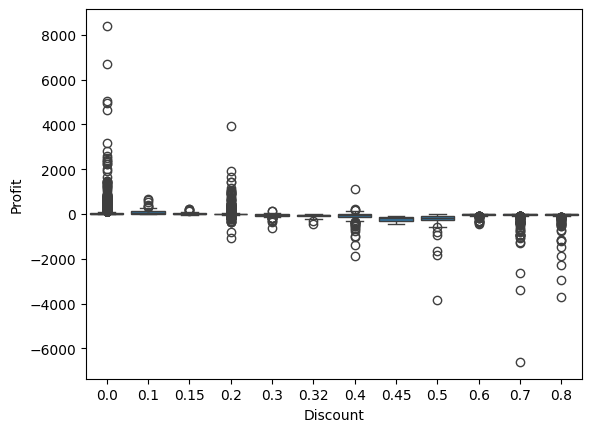

In [ ]:
sns.boxplot(x='Discount',y='Profit',data=df)

<Axes: >

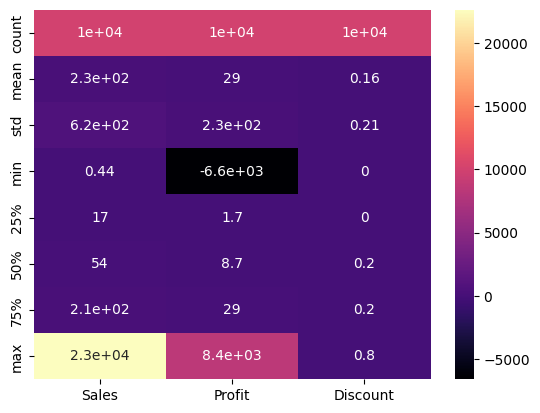

In [ ]:
sns.heatmap(corrdf,annot=True,cmap='magma')

Text(0, 0.5, 'Total Sales')

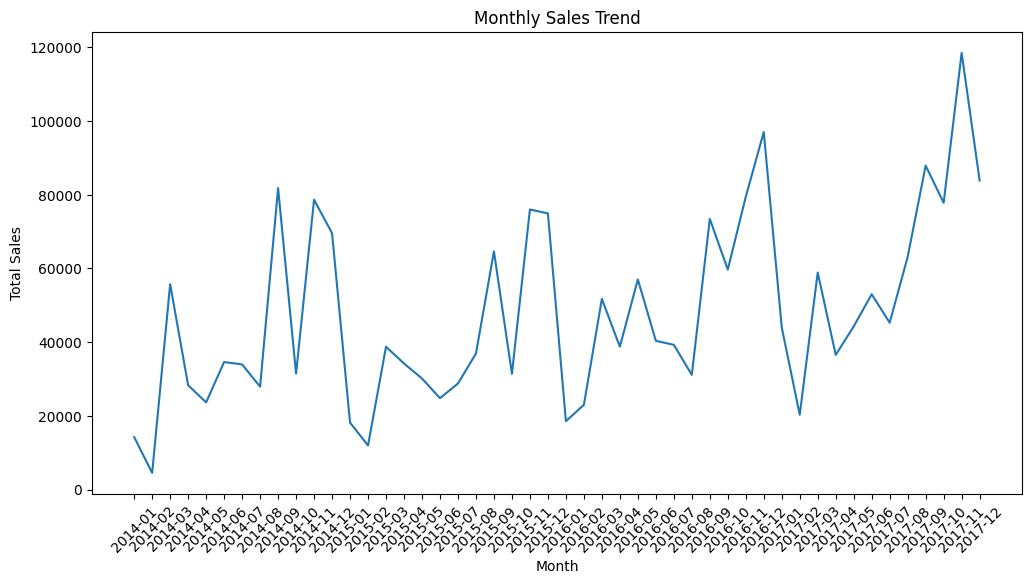

In [ ]:
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['Sales'])
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')


Text(0.5, 1.0, 'Profit by Region')

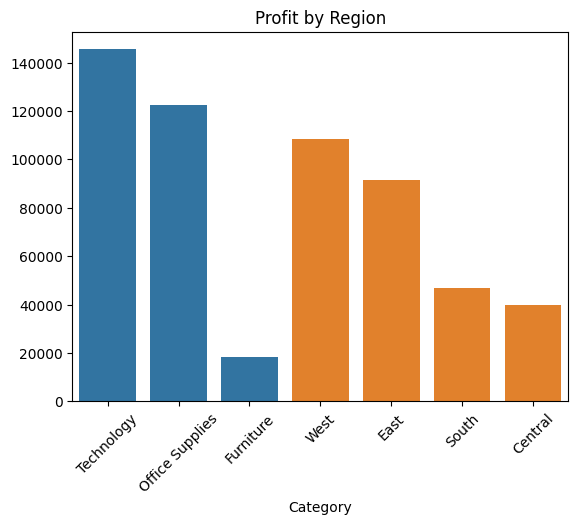

In [ ]:
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

sns.barplot(x=category_profit.index, y=category_profit.values)
plt.title('Profit by Category')
plt.xticks(rotation=45)
sns.barplot(x=region_profit.index, y=region_profit.values)
plt.title('Profit by Region')


<Axes: xlabel='Profit Flag', ylabel='count'>

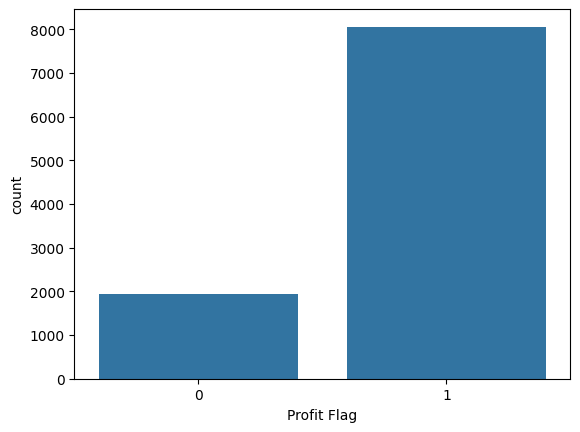

In [ ]:
df['Profit Flag'].value_counts(normalize=True)*100
sns.countplot(x='Profit Flag', data=df)



<Axes: xlabel='Profit Flag', ylabel='Sales'>

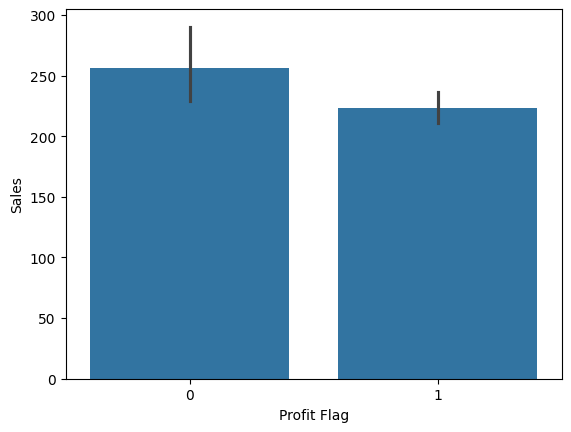

In [ ]:
sns.barplot(x='Profit Flag', y='Sales', data=df)


In [ ]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Profit Flag', 'Days to Ship', 'Sales_per_Quantity', 'Order Year',
       'Order Month', 'YearMonth', 'Log Sales', 'Profit_Category'],
      dtype='object')

<Axes: xlabel='Sales_per_Quantity', ylabel='Profit_Category'>

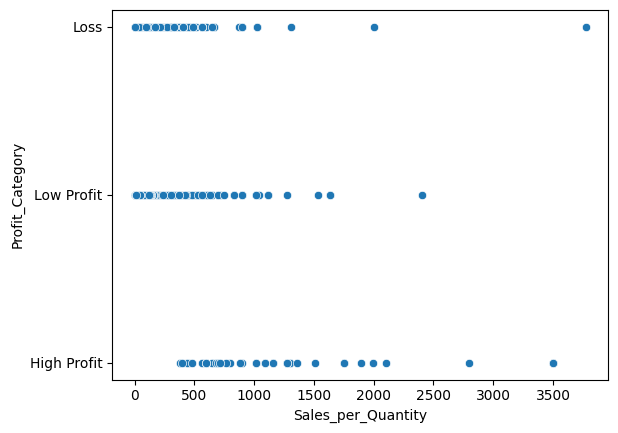

In [ ]:
sns.scatterplot(data=df,x='Sales_per_Quantity',y='Profit_Category')

<Axes: xlabel='Segment', ylabel='Profit'>

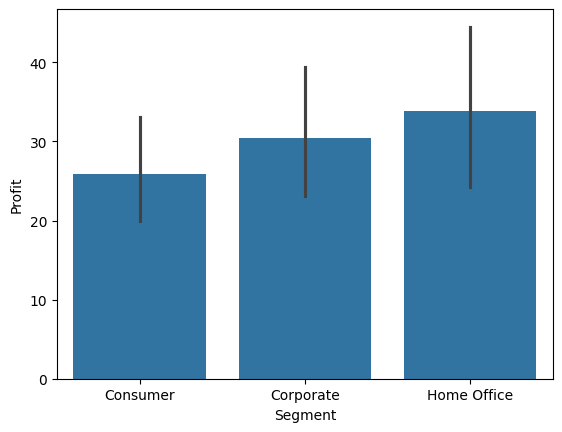

In [ ]:
sns.barplot(data=df,x='Segment',y='Profit')

<Axes: xlabel='Sales', ylabel='Segment'>

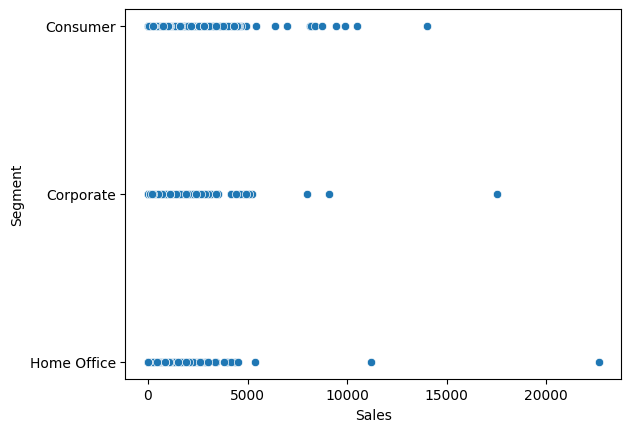

In [ ]:
sns.scatterplot(data=df,x='Sales',y='Segment')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

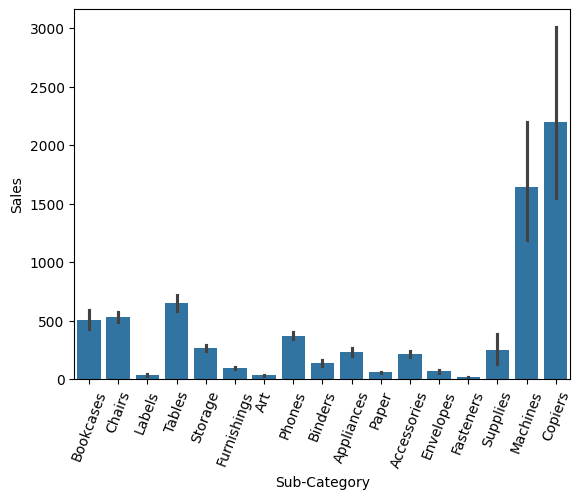

In [ ]:
sns.barplot(data=df,x='Sub-Category',y='Sales')
plt.xticks(rotation=69)

<Axes: xlabel='Segment', ylabel='Days to Ship'>

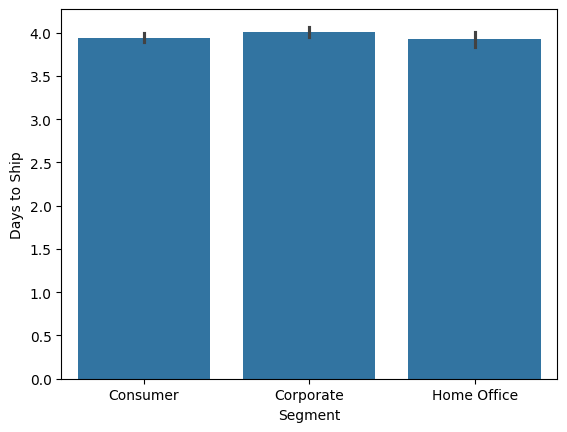

In [14]:
sns.barplot(data=df,x='Segment',y='Days to Ship')

1. Profitability Insights

Copiers are the most profitable sub-category, while Fasteners are the least.

Within broader categories, Technology stands out as the most profitable category overall.

Tables are consistently in loss, likely due to high shipping costs or excessive discounting.

Around 80% of all transactions generate profit, while 20% result in a loss, which shows a generally healthy margin but room for optimization.

2. Customer and Segment Behavior

The Consumer segment contributes the highest number of sales compared to Corporate or Home Office segments.

This suggests the store’s customer base is primarily individual buyers, not businesses.


3. Seasonal and Time-Based Trends

December 2016 recorded the highest profit, suggesting strong year-end sales momentum (holiday or clearance period).

January 2015 showed notable losses, possibly a post-holiday demand dip.

This pattern indicates seasonal fluctuations, important for inventory and marketing planning.

4. Discount and Delivery Insights

Office Supplies receive the highest discounts, which could be hurting overall profit margins.

Technology products have the least discounting, maintaining strong profitability.

Office Supplies also take longer to ship, hinting at possible supply chain inefficiencies or vendor-related delays.

5. Sales and Profit Relationship

There is a positive correlation between Sales and Profit — larger transactions tend to yield higher profits.

Outliers exist (high sales but negative profit), which could be explained by over-discounting or expensive shipping.

🧩 Key Takeaways

Focus marketing and stock allocation on Technology and Copiers.

Re-evaluate pricing and shipping for Tables and Fasteners.

Investigate high-discount, low-profit transactions (especially in Office Supplies).

Adjust inventory planning and campaign timing around seasonal demand peaks (December spikes, January drops).

In [27]:
df.to_csv('edadonefile')